<a href="https://colab.research.google.com/github/btlgs2000/dl_intro/blob/master/cani_e_gatti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cani e gatti

In [ ]:
! git clone https://github.com/btlgs2000/dl_intro

Cloning into 'dl_intro'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 33 (delta 14), reused 27 (delta 10), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization

import matplotlib.pyplot as plt

import numpy as np

from dl_intro.utils import display_samples

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vL3uIpBcd-U_xnKD4EKvXGyL7r66CuDJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vL3uIpBcd-U_xnKD4EKvXGyL7r66CuDJ" -O cats_dogs.zip && rm -rf /tmp/cookies.txt

--2020-08-21 19:47:11--  https://docs.google.com/uc?export=download&confirm=HErl&id=1vL3uIpBcd-U_xnKD4EKvXGyL7r66CuDJ
Resolving docs.google.com (docs.google.com)... 173.194.79.138, 173.194.79.101, 173.194.79.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-bc-docs.googleusercontent.com/docs/securesc/3ok0qdmjkpoov78vdqjde97bhl561uf4/32s4q45hfqeut9tl3vf7f0nknaf8l6b7/1598039175000/10454975649907589971/12949407049398912279Z/1vL3uIpBcd-U_xnKD4EKvXGyL7r66CuDJ?e=download [following]
--2020-08-21 19:47:12--  https://doc-08-bc-docs.googleusercontent.com/docs/securesc/3ok0qdmjkpoov78vdqjde97bhl561uf4/32s4q45hfqeut9tl3vf7f0nknaf8l6b7/1598039175000/10454975649907589971/12949407049398912279Z/1vL3uIpBcd-U_xnKD4EKvXGyL7r66CuDJ?e=download
Resolving doc-08-bc-docs.googleusercontent.com (doc-08-bc-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connectin

In [ ]:
! unzip /content/cats_dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs-vs-cats/train/dog/dog.55.jpg  
  inflating: dogs-vs-cats/train/dog/dog.550.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5500.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5501.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5502.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5503.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5504.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5505.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5506.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5507.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5508.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5509.jpg  
  inflating: dogs-vs-cats/train/dog/dog.551.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5510.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5511.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5512.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5513.jpg  
  inflating: dogs-vs-cats/train/dog/dog.5514.jpg  
  inflating: dogs-vs-cats/train/dog

## caricamento del dataset

In [ ]:
TRAIN_FOLDER = r'/content/dogs-vs-cats/train'
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    directory=TRAIN_FOLDER,
    labels='inferred',
    label_mode='binary',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    seed=1,
    validation_split=0.1,
    subset='training')

val_ds = keras.preprocessing.image_dataset_from_directory(
    directory=TRAIN_FOLDER,
    labels='inferred',
    label_mode='binary',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    seed=1,
    validation_split=0.1,
    subset='validation')

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [ ]:
train_ds = train_ds.map(lambda x, y: (x / 255, y))
val_ds = val_ds.map(lambda x, y: (x / 255, y))

100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


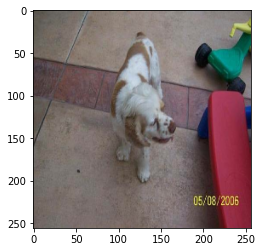

In [ ]:
from tqdm import tqdm
for batch, labels in tqdm(train_ds.take(2)):
    plt.imshow(batch[0])

## definizione del modello

In [ ]:
model = Sequential(
    [
        Conv2D(filters=100, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        Conv2D(filters=200, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        Conv2D(filters=300, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        Conv2D(filters=400, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        Flatten(),
        Dense(1000, activation='relu'),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 252, 252, 100)     7600      
_________________________________________________________________
batch_normalization_4 (Batch (None, 252, 252, 100)     400       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 100)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 200)     500200    
_________________________________________________________________
batch_normalization_5 (Batch (None, 122, 122, 200)     800       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 61, 61, 200)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 300)      

## Addestramento

In [ ]:
lr = 1e-3
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
tensorflow_callback = keras.callbacks.TensorBoard(log_dir='logs')

In [ ]:
%tensorboard --logdir logs

In [ ]:
model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
704/704 [==============================] - 168s 239ms/step - loss: 1.3888 - accuracy: 0.5169 - val_loss: 0.6930 - val_accuracy: 0.5048
Epoch 2/30
295/704 [===========>..................] - ETA: 1:33 - loss: 0.6981 - accuracy: 0.5069

KeyboardInterrupt: ignored

In [ ]:
model.test()

AttributeError: ignored